In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving billionaires.csv to billionaires.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['billionaires.csv']))
data.head(5)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [ ]:
data.shape

(2614, 22)

In [ ]:
data.columns

Index(['name', 'rank', 'year', ' company.founded ', 'company.name',
       'company.relationship', 'company.sector', 'company.type', 'Age',
       'Gender', 'Country', 'Country Code', 'location.gdp', 'Region',
       'wealth.type', 'Wealth worth', 'wealth.how.category',
       'wealth.how.from emerging', 'Industry', 'wealth.how.inherited',
       'wealth.how.was founder', 'wealth.how.was political'],
      dtype='object')

In [ ]:
data = data.rename(columns={'demographics.age':'Age', 'demographics.gender':'Gender', 'location.citizenship':'Country', 'location.country code':'Country Code', 'location.region':'Region','wealth.worth in billions':'Networth','wealth.how.industry':'Industry'})
data.columns

Index(['name', 'rank', 'year', ' company.founded ', 'company.name',
       'company.relationship', 'company.sector', 'company.type', 'Age',
       'Gender', 'Country', 'Country Code', 'location.gdp', 'Region',
       'wealth.type', 'Networth', 'wealth.how.category',
       'wealth.how.from emerging', 'Industry', 'wealth.how.inherited',
       'wealth.how.was founder', 'wealth.how.was political'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2539 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2539 non-null   object 
 1   rank                      2539 non-null   int64  
 2   year                      2539 non-null   int64  
 3    company.founded          2539 non-null   int64  
 4   company.name              2539 non-null   object 
 5   company.relationship      2539 non-null   object 
 6   company.sector            2539 non-null   object 
 7   company.type              2539 non-null   object 
 8   Age                       2539 non-null   int64  
 9   Gender                    2539 non-null   object 
 10  Country                   2539 non-null   object 
 11  Country Code              2539 non-null   object 
 12  location.gdp              2539 non-null   float64
 13  Region                    2539 non-null   object 
 14  wealth.t

In [ ]:
data.isnull().sum()

name                         0
rank                         0
year                         0
 company.founded             0
company.name                38
company.relationship        46
company.sector              23
company.type                36
Age                          0
Gender                      34
Country                      0
Country Code                 0
location.gdp                 0
Region                       0
wealth.type                 22
Wealth worth                 0
wealth.how.category          1
wealth.how.from emerging     0
Industry                     1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()

name                        0
rank                        0
year                        0
 company.founded            0
company.name                0
company.relationship        0
company.sector              0
company.type                0
Age                         0
Gender                      0
Country                     0
Country Code                0
location.gdp                0
Region                      0
wealth.type                 0
Wealth worth                0
wealth.how.category         0
wealth.how.from emerging    0
Industry                    0
wealth.how.inherited        0
wealth.how.was founder      0
wealth.how.was political    0
dtype: int64

In [ ]:
data[['Age', 'Networth']].describe()

,Age,Networth
count,2614.000000,2614.000000
mean,53.341239,3.531943
std,25.333320,5.088813
min,-42.000000,1.000000
25%,47.000000,1.400000
50%,59.000000,2.000000
75%,70.000000,3.500000
max,98.000000,76.000000


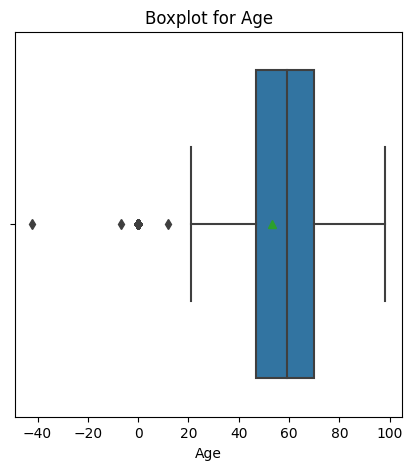

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'Age', data = data, showmeans = True)
plt.title('Boxplot for Age')
plt.show()

In [ ]:
data['Age'] = data['Age'].apply(lambda x: np.nan if x <= 0 else x)

In [ ]:
data[['Age', 'Networth']].describe()

,Age,Networth
count,2229.000000,2614.000000
mean,62.576492,3.531943
std,13.134715,5.088813
min,12.000000,1.000000
25%,53.000000,1.400000
50%,62.000000,2.000000
75%,72.000000,3.500000
max,98.000000,76.000000


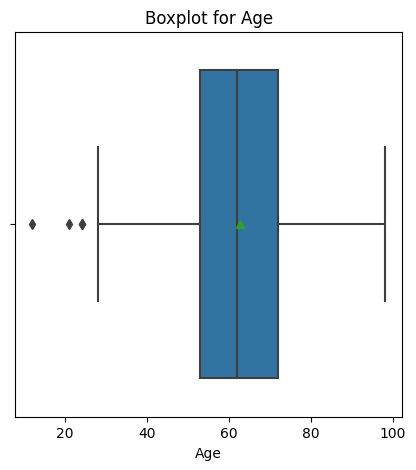

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'Age', data = data, showmeans = True)
plt.title('Boxplot for Age')
plt.show()

Top 10 Countries with Most Billionaires

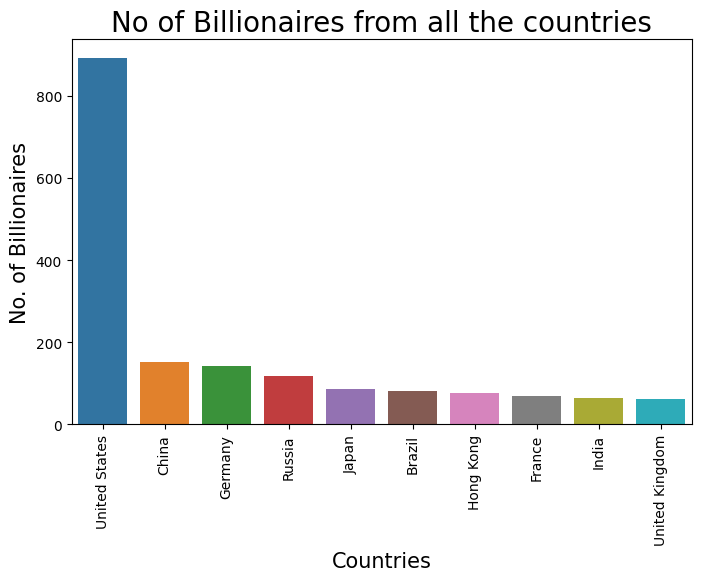

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = data, x = 'Country', order = data['Country'].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.ylabel('No. of Billionaires', fontsize = 15)
plt.xlabel('Countries', fontsize = 15)
plt.title('No of Billionaires from all the countries', fontsize = 20)
plt.show()

In [ ]:
data['Country'].value_counts().nlargest(10)

United States     893
China             151
Germany           143
Russia            117
Japan              85
Brazil             80
Hong Kong          76
France             69
India              63
United Kingdom     62
Name: Country, dtype: int64

What age group represents the highest and lowest number of billionaires

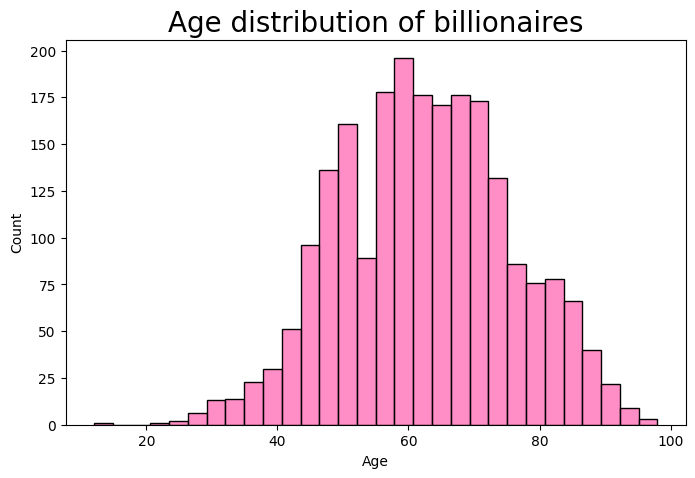

In [ ]:
#Age distributions of billionaires
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = 'Age', color = 'hotpink')
plt.title('Age distribution of billionaires', fontsize = 20)
plt.show()

In [ ]:
#youngest billionaire
data.loc[data.Age == data.Age.min()]

NameError: ignored

In [ ]:
#Age group of billionaires
data['Age_group'] = pd.cut(data['Age'], bins = [10, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest = True, labels = ['10-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+'])
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,Age,Gender,...,Region,wealth.type,Wealth worth,wealth.how.category,wealth.how.from emerging,Industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political,Age_group
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40.0,male,...,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True,30-40
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45.0,male,...,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True,40-50
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58.0,male,...,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True,50-60
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65.0,male,...,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True,60-70
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70.0,male,...,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True,60-70


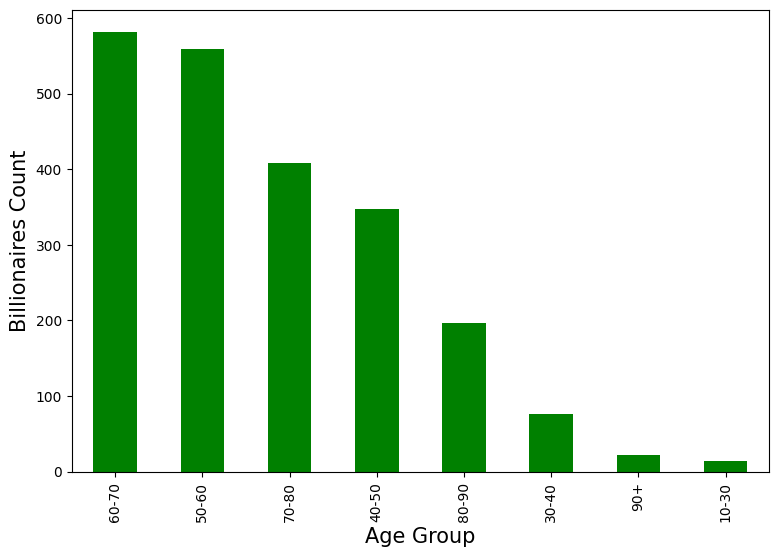

In [ ]:
data['Age_group'].value_counts().plot(kind = 'bar', figsize = (9,6), color = 'green')
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Billionaires Count', fontsize = 15)
plt.show()

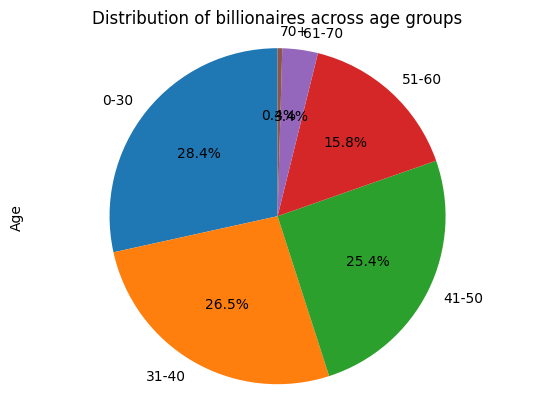

In [ ]:
# Calculate the number of billionaires in each age group
age_groups = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 70, 100])
counts = age_groups.value_counts()

# Plot the pie chart
counts.plot(kind='pie', autopct='%0.1f%%', startangle=90,
            labels=['0-30', '31-40', '41-50', '51-60', '61-70', '70+'])
plt.axis('equal')
plt.title('Distribution of billionaires across age groups')
plt.show()

In [ ]:
data.head(2)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,Age,Gender,...,Region,wealth.type,Wealth worth,wealth.how.category,wealth.how.from emerging,Industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political,Age_group
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40.0,male,...,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True,30-40
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45.0,male,...,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True,40-50


In [ ]:
data['Industry'] = np.where(data['Industry']==0, np.nan, data['Industry'])

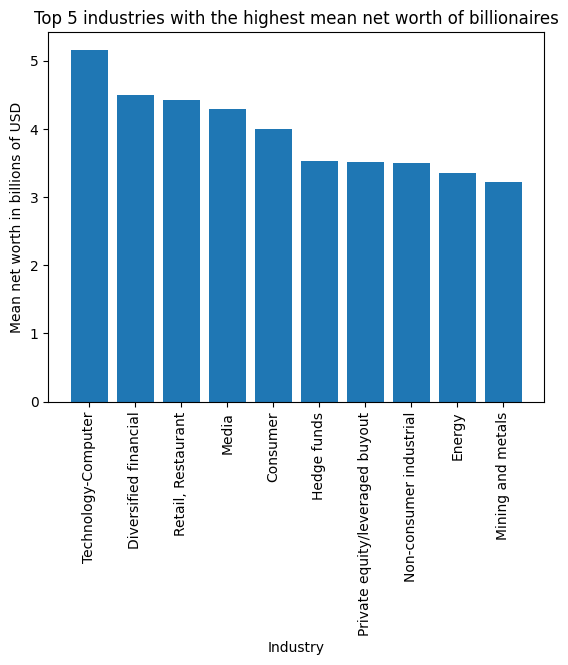

In [ ]:
Net_worth_by_industry = data.groupby('Industry')['Networth'].mean().reset_index()
top_5_industries = Net_worth_by_industry.sort_values(by='Networth', ascending=False).head(10)
plt.bar(top_5_industries['Industry'], top_5_industries['Networth'])
plt.ylabel('Mean net worth in billions of USD')
plt.xlabel('Industry')
plt.title('Top 5 industries with the highest mean net worth of billionaires')
plt.xticks(rotation = 90)
plt.show()

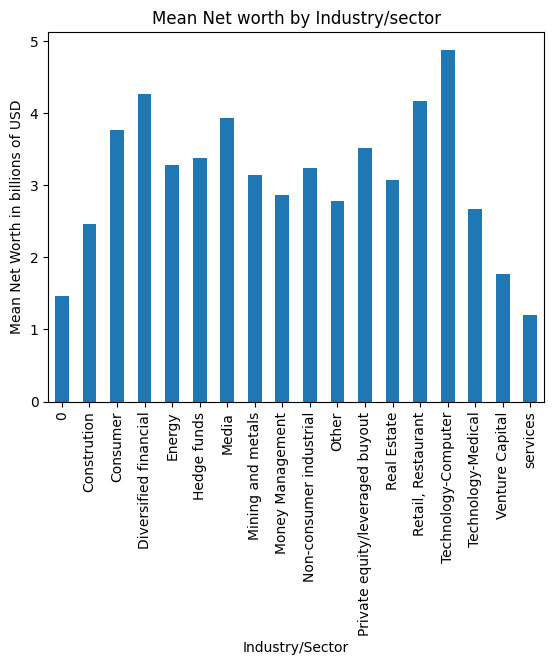

In [ ]:
data['Industry'] = np.where(data['Industry']==0, np.nan, data['Industry'])
Net_worth_by_sector = data.groupby('Industry')['Wealth worth'].mean()
Net_worth_by_sector.plot(kind = 'bar')
plt.xlabel('Industry/Sector')
plt.ylabel('Mean Net Worth in billions of USD')
plt.title('Mean Net worth by Industry/sector')
plt.show()

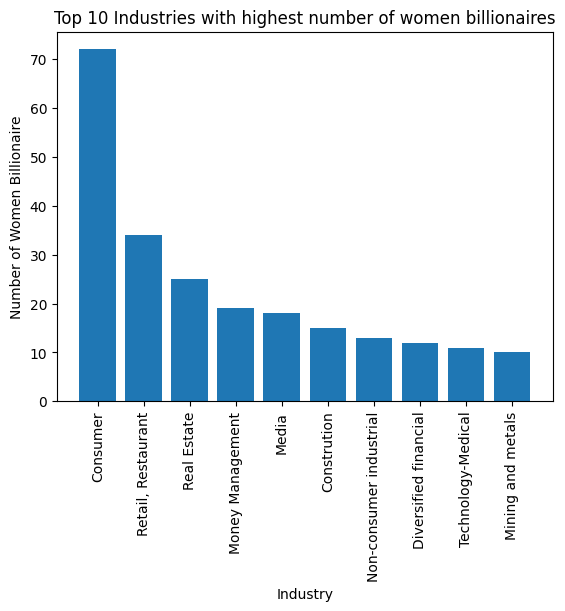

In [ ]:
Women_billionaires = data[data['Gender'] == 'female']
Women_industry = Women_billionaires['Industry'].value_counts()
top_industries = Women_industry.head(10)
plt.bar(top_industries.index, top_industries.values)
plt.xlabel('Industry')
plt.ylabel('Number of Women Billionaire')
plt.title('Top 10 Industries with highest number of women billionaires')
plt.xticks(rotation = 90)
plt.show()

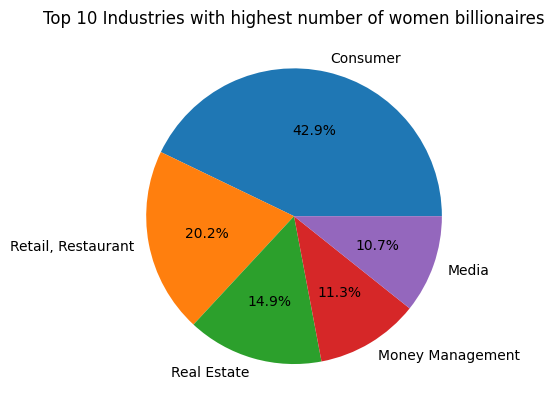

In [ ]:
# Filter the data to only include women billionaires
Women_billionaires = data[data['Gender'] == 'female']

# Count the number of women billionaires in each industry
Women_industry = Women_billionaires['Industry'].value_counts()

# Get the top 10 industries with the highest number of women billionaires
top_industries = Women_industry.head(5)

# Plot the data as a pie chart
plt.pie(top_industries.values, labels=top_industries.index, autopct='%1.1f%%')
plt.title('Top 10 Industries with highest number of women billionaires')
plt.show()

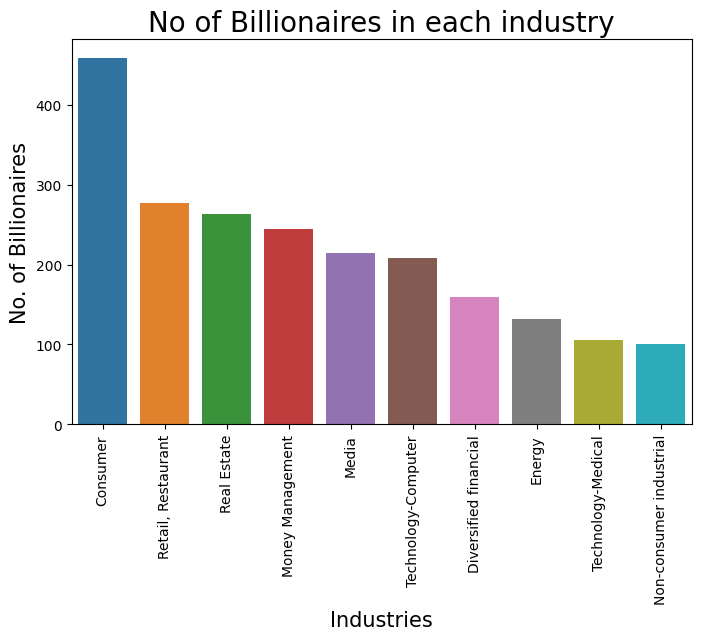

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = data, x = 'Industry', order = data['Industry'].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.ylabel('No. of Billionaires', fontsize = 15)
plt.xlabel('Industries', fontsize = 15)
plt.title('No of Billionaires in each industry', fontsize = 20)
plt.show()

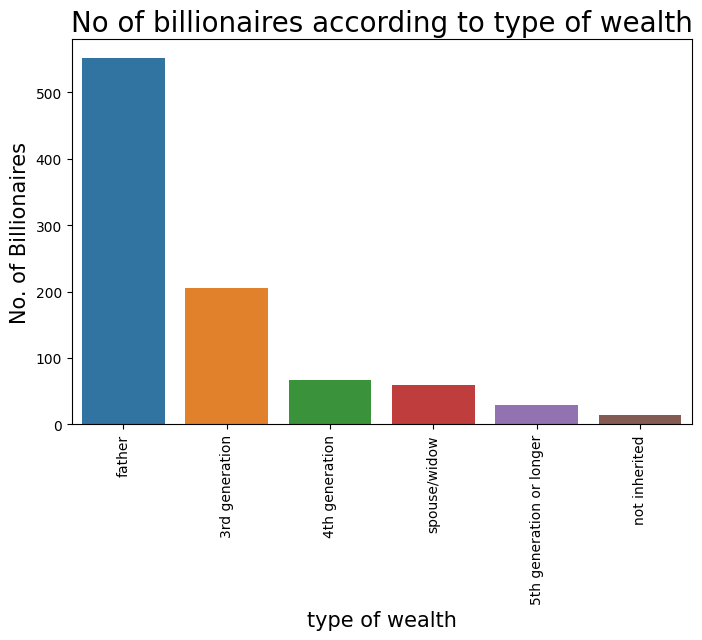

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = data, x = 'wealth.how.inherited', order = data['wealth.how.inherited'].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.ylabel('No. of Billionaires', fontsize = 15)
plt.xlabel('type of wealth', fontsize = 15)
plt.title('No of billionaires according to type of wealth', fontsize = 20)
plt.show()

In [ ]:
data['wealth.how.inherited'].value_counts().nlargest(10)

father                      552
3rd generation              205
4th generation               67
spouse/widow                 59
5th generation or longer     29
not inherited                14
Name: wealth.how.inherited, dtype: int64

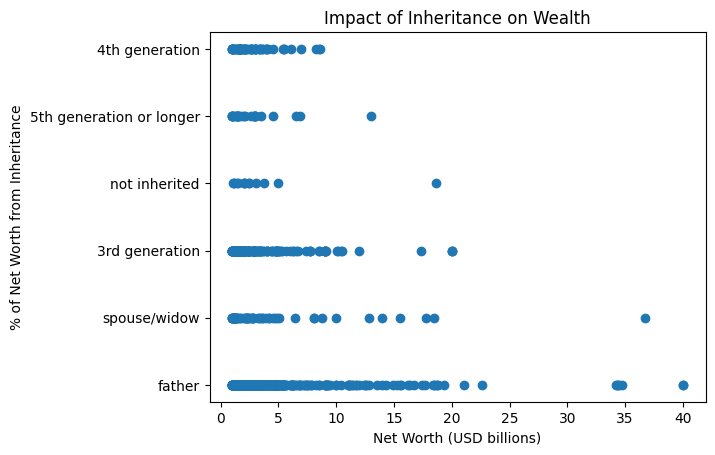

In [ ]:
data = data[(data['wealth.type'] == 'inherited') & (data['Wealth worth'].notnull()) & (data['wealth.how.inherited'].notnull())]

# Create a scatter plot of net worth vs. % from inheritance
plt.scatter(data['Wealth worth'], data['wealth.how.inherited'])
plt.xlabel('Net Worth (USD billions)')
plt.ylabel('% of Net Worth from Inheritance')
plt.title('Impact of Inheritance on Wealth')
plt.show()

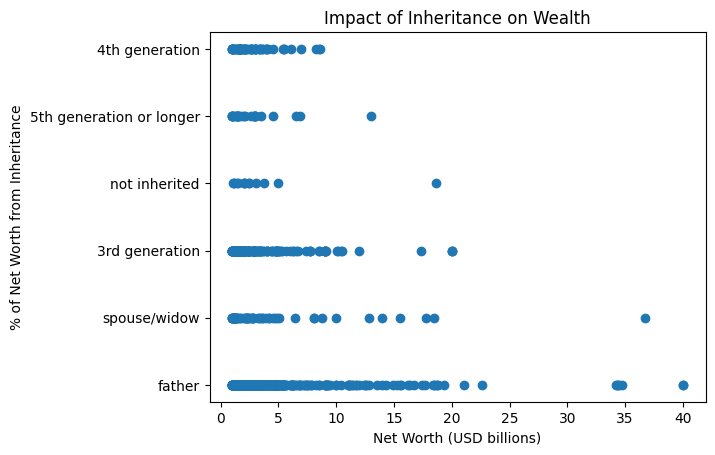

In [ ]:
# Create a scatter plot of net worth vs. % from inheritance
plt.scatter(data['Wealth worth'], data['wealth.how.inherited'])
plt.xlabel('Net Worth (USD billions)')
plt.ylabel('% of Net Worth from Inheritance')
plt.title('Impact of Inheritance on Wealth')
plt.show()

In [ ]:
# Group the data by the percentage of wealth from inheritance
inheritance_groups = data.groupby('wealth.how.inherited')

# Calculate the mean net worth for each group
mean_net_worths = inheritance_groups['Wealth worth']

# Create a bar plot of mean net worth vs. % from inheritance
plt.bar(mean_net_worths.index, mean_net_worths.values)
plt.xlabel('% of Net Worth from Inheritance')
plt.ylabel('Mean Net Worth (USD billions)')
plt.title('Impact of Inheritance on Wealth')
plt.xticks(rotation = 90)
plt.show()

AttributeError: ignored

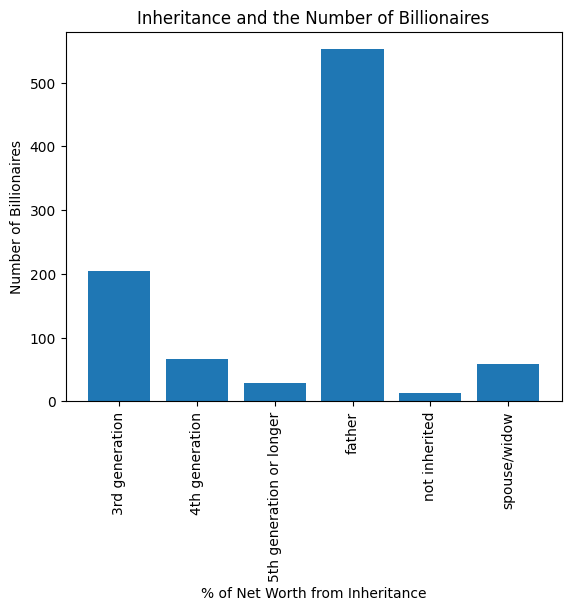

In [ ]:
# Filter out rows where the percentage of wealth from inheritance is missing or zero
data = data[(data['wealth.type'] == 'inherited') & (data['wealth.how.inherited'].notnull())]

# Group the data by the percentage of wealth from inheritance
inheritance_groups = data.groupby('wealth.how.inherited')

# Count the number of billionaires in each group
num_billionaires = inheritance_groups.size()

# Create a bar plot of number of billionaires vs. % from inheritance
plt.bar(num_billionaires.index, num_billionaires.values)
plt.xlabel('% of Net Worth from Inheritance')
plt.ylabel('Number of Billionaires')
plt.title('Inheritance and the Number of Billionaires')
plt.xticks(rotation = 90)
plt.show()


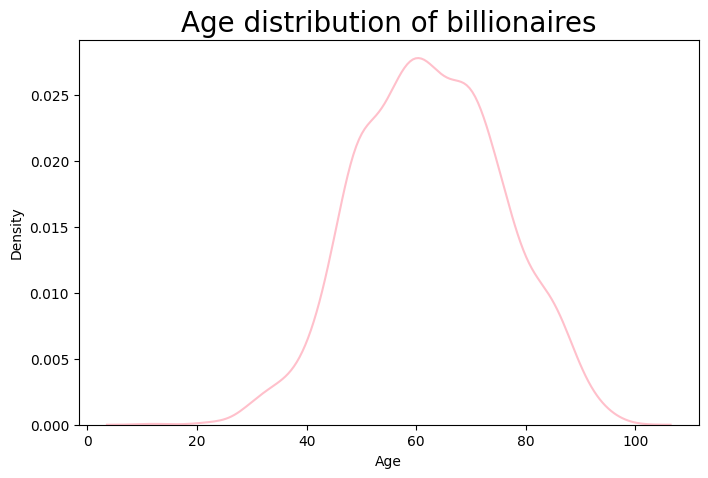

In [ ]:
#Age distributions of billionaires with density plot
plt.figure(figsize = (8,5))
sns.kdeplot(data = data, x = 'Age', color = 'pink')
plt.title('Age distribution of billionaires', fontsize = 20)
plt.show()

In [ ]:
# Step 1: Calculate the IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the dataset to exclude any values outside the lower and upper bounds
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

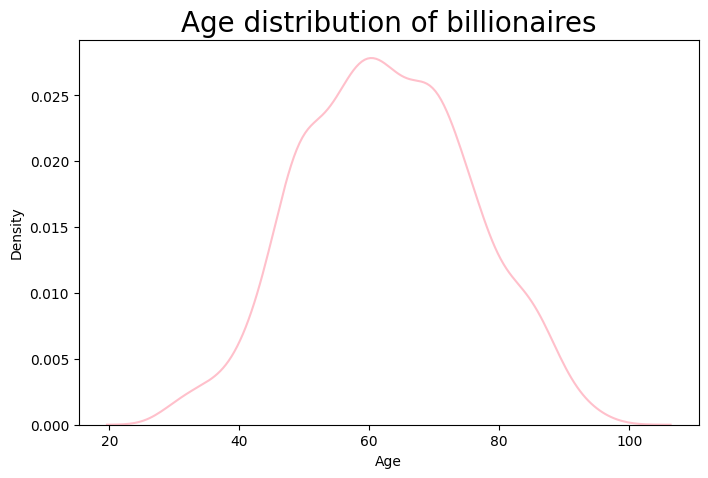

In [ ]:
#Age distributions of billionaires with density plot
plt.figure(figsize = (8,5))
sns.kdeplot(data = data, x = 'Age', color = 'pink')
plt.title('Age distribution of billionaires', fontsize = 20)
plt.show()

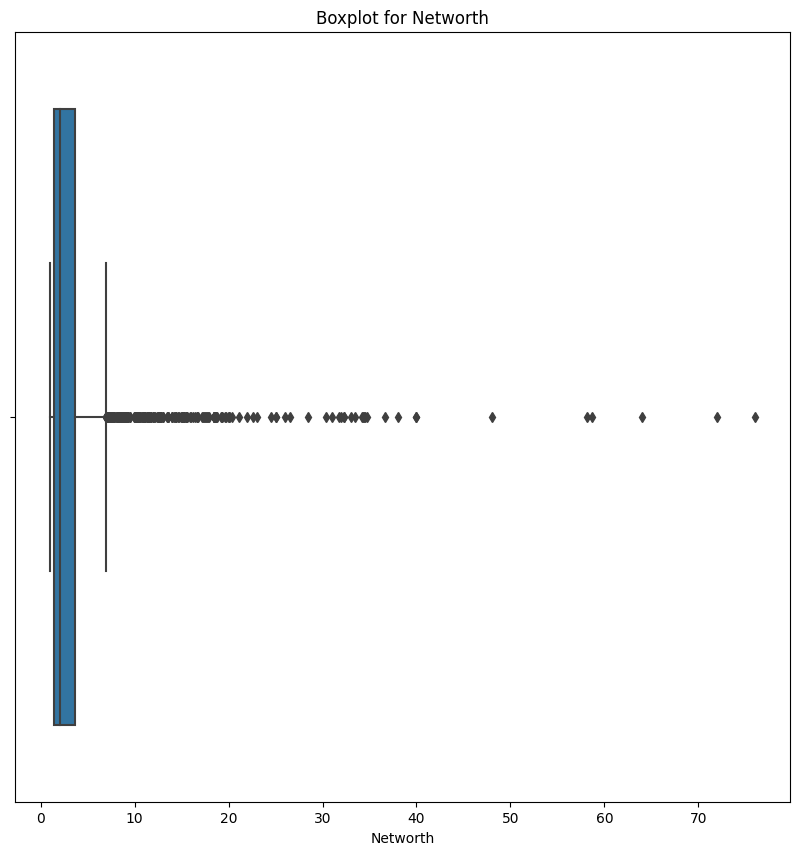

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Networth', data = data)
plt.title('Boxplot for Networth')
plt.show()

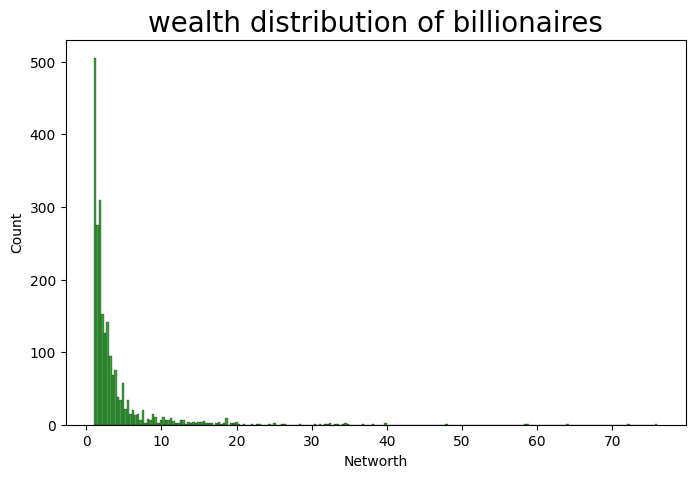

In [ ]:
#Age distributions of billionaires
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = 'Networth', color = 'green')
plt.title('wealth distribution of billionaires', fontsize = 20)
plt.show()

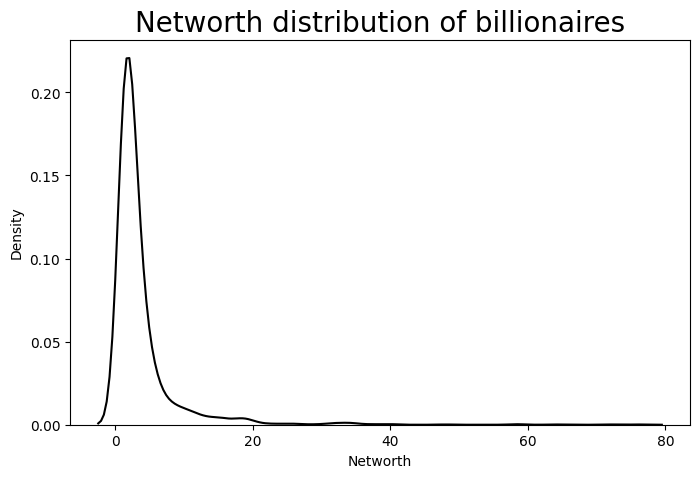

In [ ]:
#Age distributions of billionaires with density plot
plt.figure(figsize = (8,5))
sns.kdeplot(data = data, x = 'Networth', color = 'black')
plt.title('Networth distribution of billionaires', fontsize = 20)
plt.show()

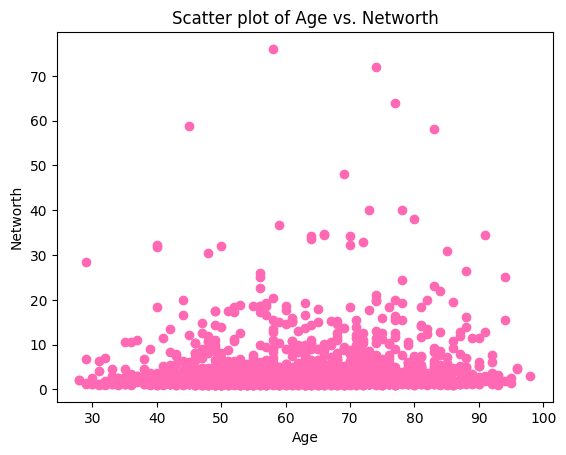

In [ ]:
# assuming your dataset is stored in a variable called "df"
x = data['Age']
y = data['Networth']

plt.scatter(x, y, color = 'hotpink')
plt.title('Scatter plot of Age vs. Networth')
plt.xlabel('Age')
plt.ylabel('Networth')
plt.show()

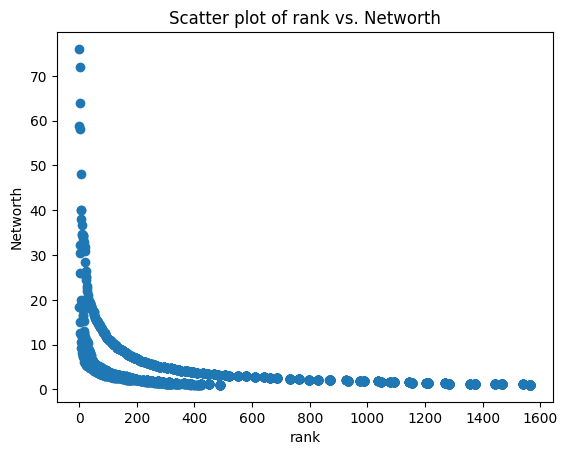

In [ ]:
x = data['rank']
y = data['Networth']

plt.scatter(x, y)
plt.title('Scatter plot of rank vs. Networth')
plt.xlabel('rank')
plt.ylabel('Networth')
plt.show()



```
# This is formatted as code
```

Research question 3: What are the main industries with the highest number of women billionaires?

Null hypothesis: There is no significant difference in the number of women billionaires across different industries.
Alternative hypothesis: Some industries have a significantly higher number of women billionaires than others.

In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table of the number of women billionaires by industry
contingency_table = pd.crosstab(data['Industry'], data['Gender'])

# Conduct a chi-square test to compare the number of women billionaires across different industries
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(p_value)
# Check if the p-value is significant at a 5% level
if p_value < 0.05:
    print("Reject null hypothesis: Some industries have a significantly higher number of women billionaires than others.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the number of women billionaires.")

0.0003405451067895316
Reject null hypothesis: Some industries have a significantly higher number of women billionaires than others.


Null hypothesis: There is no significant relationship between age and net worth of billionaires.

Alternative hypothesis: There is a significant relationship between age and net worth of billionaires.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

#Conduct a Pearson correlation test to determine the relationship between age and net worth
correlation, p_value = pearsonr(data['Age'], data['Networth'])
print(p_value)

# Check if the p-value is significant at a 5% level
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant relationship between age and net worth of billionaires.")
else:
    print("Fail to reject null hypothesis: There is no significant relationship between age and net worth of billionaires.")

NameError: ignored

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
# Split the data into two groups based on age (e.g., below and above the median age)
below_median = data.loc[data['Age'] < data['Age'].median(), 'Networth']
above_median = data.loc[data['Age'] >= data['Age'].median(), 'Networth']

# Conduct a two-sample t-test to compare the means of net worth between the two groups
t_stat, p_value = ttest_ind(below_median, above_median, equal_var=False)
print(p_value)

# Check if the p-value is significant at a 5% level
if p_value < 0.05:
    print("There is no significant relationship between Age and Networth")
else:
    print("There is a significant relationship between Age and Networth")

0.0015455555889560644
There is no significant relationship between Age and Networth


In [ ]:
from scipy.stats import ttest_ind
# Extract net worth data for technology sector and finance sector
tech_data = data[data['Industry'] == 'Technology-Computer']['Networth']
finance_data = data[data['Industry'] == 'Diversified financial']['Networth']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(tech_data, finance_data)

# Print the results
print('t-statistic: ', t_stat)
print('p-value: ', p_val)


t-statistic:  0.7298904576619277
p-value:  0.4659845156810486


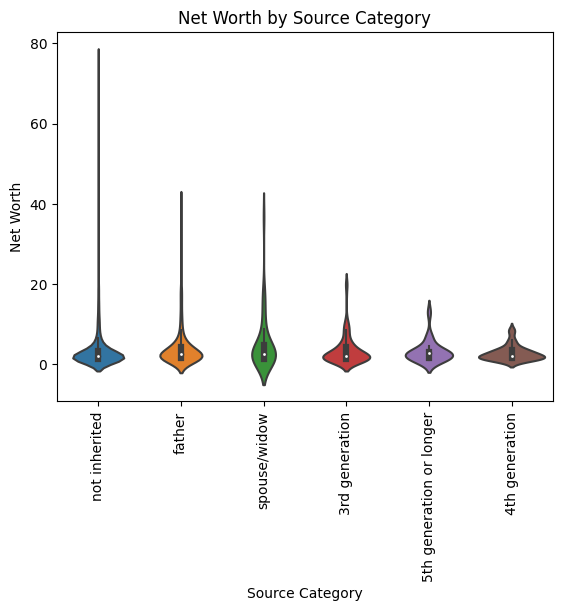

In [ ]:
# Create a violin plot of net worth by source category
sns.violinplot(x='wealth.how.inherited', y='Networth', data=data)
plt.title('Net Worth by Source Category')
plt.xlabel('Source Category')
plt.ylabel('Net Worth')
plt.xticks(rotation = 90)
plt.show()

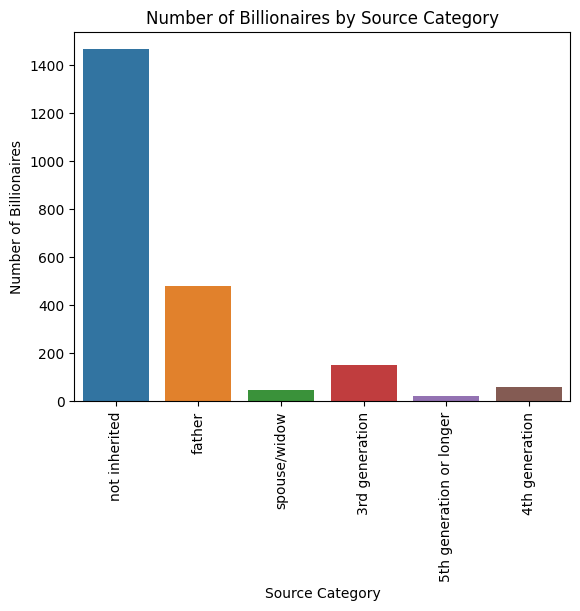

In [ ]:
# Create a countplot of billionaires by source category
sns.countplot(x='wealth.how.inherited', data=data)
plt.title('Number of Billionaires by Source Category')
plt.xlabel('Source Category')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation = 90)
plt.show()

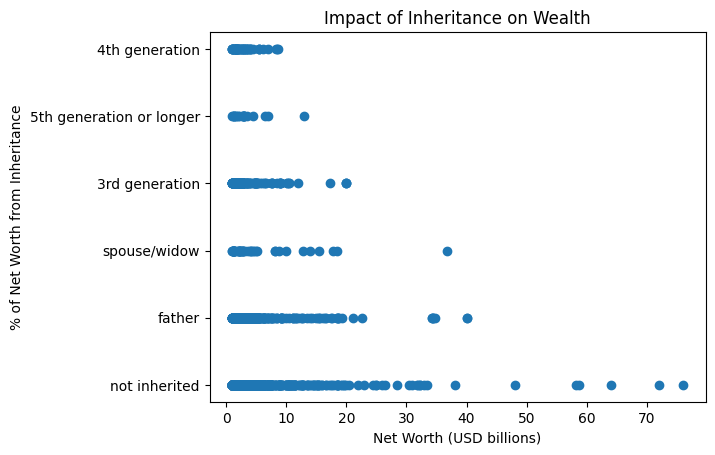

In [ ]:
# Create a scatter plot of net worth vs. % from inheritance
plt.scatter(data['Networth'], data['wealth.how.inherited'])
plt.xlabel('Net Worth (USD billions)')
plt.ylabel('% of Net Worth from Inheritance')
plt.title('Impact of Inheritance on Wealth')
plt.show()

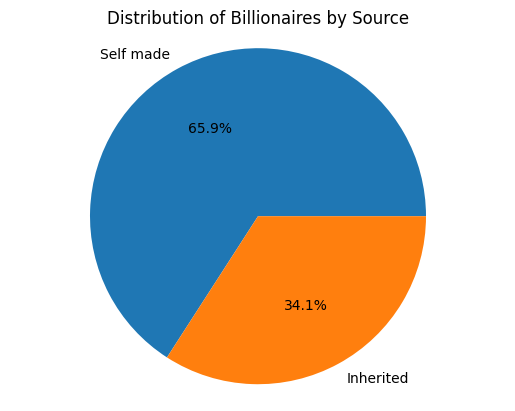

In [ ]:
data['wealth.how.inherited'] = data['wealth.how.inherited'].replace(['3rd generation', '4th generation', '5th generation or longer', 'father', 'spouse/widow'], 'Inherited')
data['wealth.how.inherited'] = data['wealth.how.inherited'].replace(['not inherited'], 'Self made')

# Create a pie chart of billionaires by source category
source_counts = data['wealth.how.inherited'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Billionaires by Source')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Billionaires Vs Source')

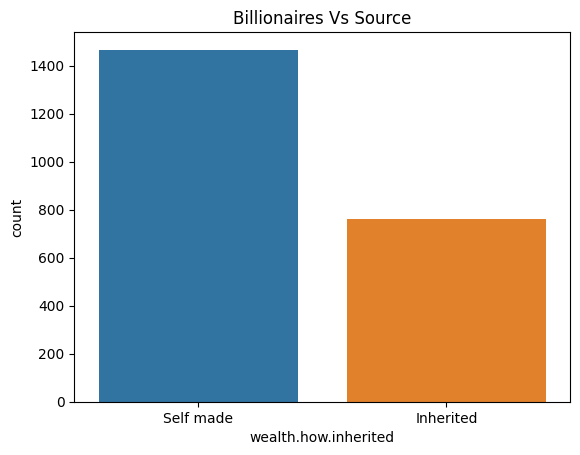

In [ ]:
data['wealth.how.inherited'] = data['wealth.how.inherited'].replace(['3rd generation', '4th generation', '5th generation or longer', 'father', 'spouse/widow'], 'Inherited')
data['wealth.how.inherited'] = data['wealth.how.inherited'].replace(['not inherited'], 'Self made')

sns.countplot(x = 'wealth.how.inherited', data = data)
plt.title('Billionaires Vs Source')